**Problem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**Business Goal:**

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

**High level steps**

1. Data Understanding 

2. Data Cleaning

3. Data Visualization

4. Data Preparation

5. Data Modelling and Evaluation

## 1. Data Understanding

#### Loading the dataset

In [2]:
bike_share = pd.read_csv(r'C:\Users\ravisand\Documents\PG\Bike Sharing Assignment\day.csv')

#### Inspect the various aspects of the bike_share dataframe

In [3]:
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike_share.shape

(730, 16)

## 2. Data Cleaning

In [7]:
bike_share.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**There are no columns with NULL values in the dataset** 

In [8]:
bike_share[bike_share.isnull().sum(axis=1) > 0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


**There are no rows with NULL values in the dataset** 

**Post reviewing the data these 3 columns can be dropped.**

1. **instant** - As we already have index value for our dataframe, this is redundant column and hence we can drop this.
2. **dteday** - As we have weekday, mnth and yr columns which explains the date of the record, this column is redundant and we can drop this.
3. **casual** - As we will be doing the analysis/building the model for the total count of users(casual and registered combined), we can safely drop this column.
4. **registered** - As we will be doing the analysis/building the model for the total count of users(casual and registered combined), we can safely drop this column.

In [9]:
bike_share.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [10]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## 3. Data Visualization

### 3.1 Univariate Analysis on Categorical Variables

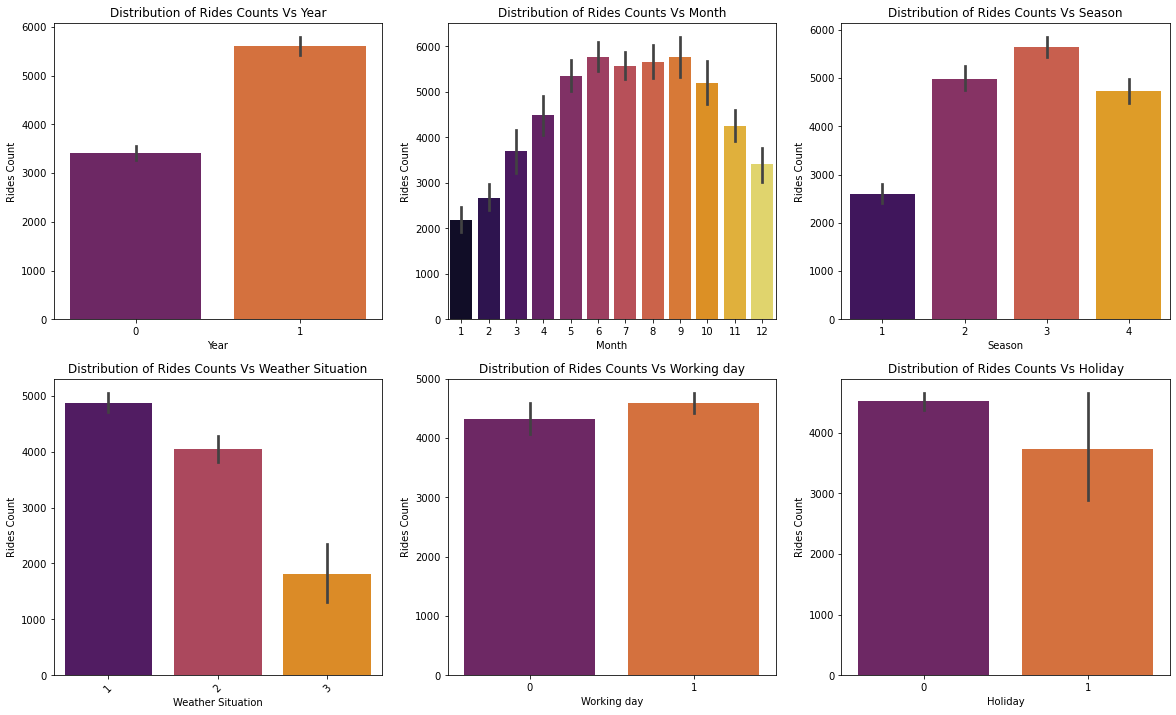

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x='yr', y='cnt', data=bike_share, palette="inferno")
plt.xlabel('Year')
plt.ylabel('Rides Count')
plt.title('Distribution of Rides Counts Vs Year')
plt.subplot(2,3,2)
sns.barplot(x='mnth', y='cnt', data=bike_share, palette="inferno")
plt.xlabel('Month')
plt.ylabel('Rides Count')
plt.title('Distribution of Rides Counts Vs Month')
plt.subplot(2,3,3)
sns.barplot(x='season', y='cnt', data=bike_share, palette="inferno")
plt.xlabel('Season')
plt.ylabel('Rides Count')
plt.title('Distribution of Rides Counts Vs Season')
plt.subplot(2,3,4)
sns.barplot(x='weathersit', y='cnt', data=bike_share, palette="inferno")
plt.xlabel('Weather Situation')
plt.ylabel('Rides Count')
plt.title('Distribution of Rides Counts Vs Weather Situation')
plt.xticks(rotation=45)
plt.subplot(2,3,5)
sns.barplot(x='workingday', y='cnt', data=bike_share, palette="inferno")
plt.xlabel('Working day')
plt.ylabel('Rides Count')
plt.title('Distribution of Rides Counts Vs Working day')
plt.subplot(2,3,6)
sns.barplot(x='holiday', y='cnt', data=bike_share, palette="inferno")
plt.xlabel('Holiday')
plt.ylabel('Rides Count')
plt.title('Distribution of Rides Counts Vs Holiday')
plt.show()

**Inferences:**

1. As we can see in the above plot, there is a good jump in the number of rides from 2018 to 2019. Hence 'yr' can be a significant feature in our model.

2. There is definitely some pattern in the distribution of ride counts across the months. The ride counts are higher during the middle months(May-Oct) and relatively low in the year beginning and at the end. So this feature can be one of the deciding factors for our model.

3. Ride count is more during the seasons Fall, Summer and Winter seasons.

4. Majority rides are taken when the weather is Clear, Few Clouds, Partly cloudy.

5. The ride counts are little higher on working days.

6. Ride counts are lower during the holidays.

### 3.2 Univariate Analysis on Continous/Quantitative Variables

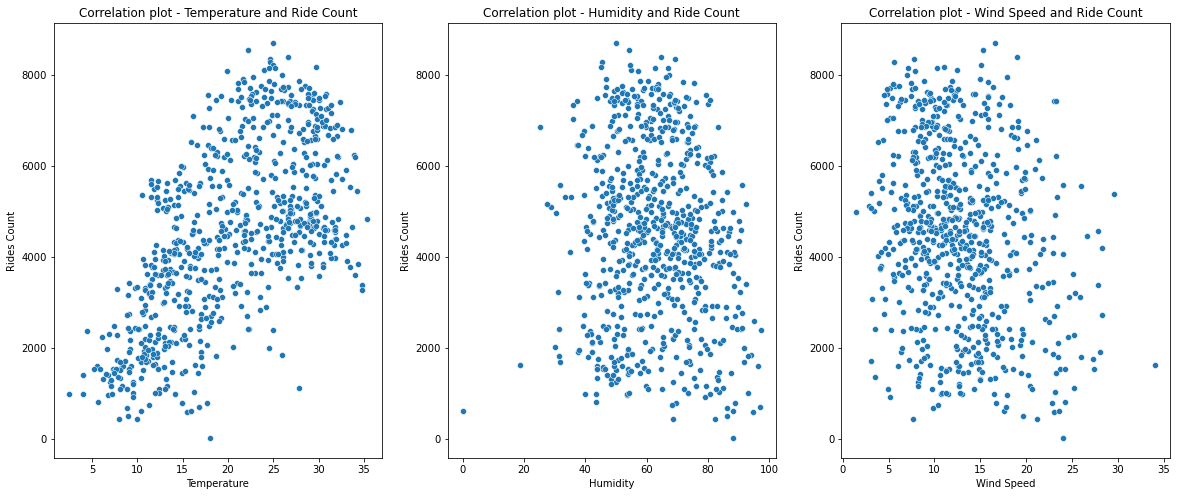

In [12]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(y="cnt", x="temp", data = bike_share)
plt.title('Correlation plot - Temperature and Ride Count')
plt.xlabel('Temperature')
plt.ylabel('Rides Count')
plt.subplot(1,3,2)
sns.scatterplot(y="cnt", x="hum", data = bike_share)
plt.title('Correlation plot - Humidity and Ride Count')
plt.xlabel('Humidity')
plt.ylabel('Rides Count')
plt.subplot(1,3,3)
sns.scatterplot(y="cnt", x="windspeed", data = bike_share)
plt.title('Correlation plot - Wind Speed and Ride Count')
plt.xlabel('Wind Speed')
plt.ylabel('Rides Count')
plt.show()

**Inferences:**
1. There is a postive correlation between temperature and ride count.

2. For the Humidity plot, we are unable to make to any inference as the points are randomly scattered.

3. For the Wind Speed plot, we are unable to make to any inference as the points are randomly scattered.

### 3.3 Bivariate Analysis

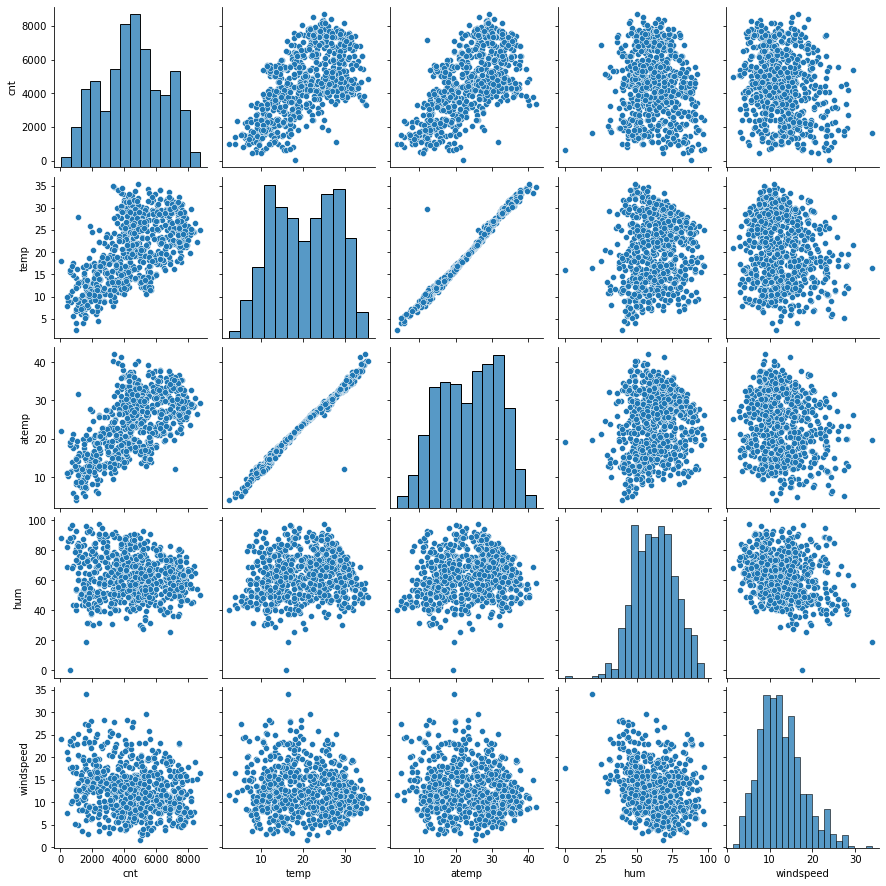

In [13]:
sns.pairplot(bike_share[["cnt",'temp','atemp',"hum","windspeed"]])

Inferences:

1. The plots of cnt, temp, hum and windspeed has a normal distribution.

2. Temperature and cnt are positively correlated.

3. Humidity and windspeed doesn't follow a pattern for ride counts.

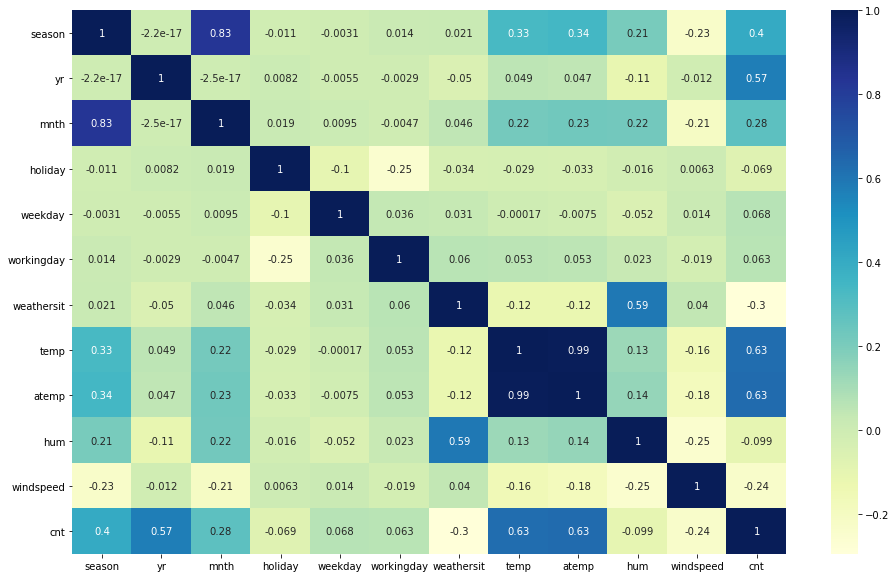

In [14]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_share.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Insights from above data:**

1. Temp(temperature) is highly correlated with atemp(feeling temperature) with a degree of 0.99 . Hence it is fair to drop the 'atemp' column.

2. 'cnt' is positively correlated with 'yr' and 'temp'.

3. 'season' and 'mnth' are highly correlated.

In [15]:
# Dropping the column 'atemp'
bike_share.drop(['atemp'],axis=1,inplace=True)

## 4. Data Preparation

### 4.1 Converting categorical feature values to strings

 **'weathersit'** and **'season'** are unordered categorical variables.
 
  These variables are having values as 1, 2, 3, 4 which have specific labels associated with them.
  
  Hence converting these feature values into categorical string values to not treat them as either as quantitative variables or ordered categorical variables. 
  
  Also **explainability** will be easier through strings, otherwise we need to have data dictionary to understand the variable values.
  
 1.  weathersit : 
  
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
        
        
 2.  season : season (1:spring, 2:summer, 3:fall, 4:winter)
  
 3. weekday
 
 4. month

In [16]:
# Converting season values to strings
bike_share['season'] = bike_share['season'].map({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'})

In [17]:
bike_share['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [18]:
# Converting weather situation values to strings
bike_share['weathersit'] = bike_share['weathersit'].map({1 : 'Clear, Partly cloudy', 2 : 'Mist Cloudy/Broken clouds/Few clouds', 3 : 'Light Snow/Rain/Thunderstorm/Scattered clouds', 4 : 'Heavy Rain/Ice Pallets/Thunderstorm'})

In [19]:
bike_share['weathersit'].value_counts()

Clear, Partly cloudy                             463
Mist Cloudy/Broken clouds/Few clouds             246
Light Snow/Rain/Thunderstorm/Scattered clouds     21
Name: weathersit, dtype: int64

In [20]:
# Converting weekday values to strings
bike_share['weekday'] = bike_share['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [21]:
# Converting month values to strings
bike_share['mnth'] = bike_share['mnth'].apply(lambda x: calendar.month_abbr[x])

In [22]:
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist Cloudy/Broken clouds/Few clouds,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist Cloudy/Broken clouds/Few clouds,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,"Clear, Partly cloudy",8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,"Clear, Partly cloudy",8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,"Clear, Partly cloudy",9.305237,43.6957,12.522300,1600


### 4.2 Create dummy variables for the categorical variables

We need to create the dummy variables for the following categorical variables.

1. season

2. mnth

3. weekday

4. weathersit

In [23]:
# Creating dummy variables for the categorical variables
dummy_cat_vars = pd.get_dummies(bike_share[['season','mnth','weekday','weathersit']],drop_first=True )

In [24]:
# Concatinating the dummy varibles dataframe to original dataframe
bike_share = pd.concat([bike_share,dummy_cat_vars],axis = 1)

In [25]:
# As we have created dummy variables which explains these variables, dropping the categorical columns
bike_share.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [26]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   yr                                                        730 non-null    int64  
 1   holiday                                                   730 non-null    int64  
 2   workingday                                                730 non-null    int64  
 3   temp                                                      730 non-null    float64
 4   hum                                                       730 non-null    float64
 5   windspeed                                                 730 non-null    float64
 6   cnt                                                       730 non-null    int64  
 7   season_spring                                             730 non-null    uint8  
 8   season_summer       

In [27]:
bike_share.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow/Rain/Thunderstorm/Scattered clouds,weathersit_Mist Cloudy/Broken clouds/Few clouds
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### 4.3 Splitting the data into train and test datasets

**Dividing the dataset into training and test sets in 80:20 ratio**

In [28]:
np.random.seed(0)
bike_share_train, bike_share_test = train_test_split(bike_share, train_size =0.8,random_state = 100)

In [29]:
print(bike_share_train.shape)
print(bike_share_test.shape)

(584, 29)
(146, 29)


In [30]:
bike_share_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow/Rain/Thunderstorm/Scattered clouds,weathersit_Mist Cloudy/Broken clouds/Few clouds
367,1,0,1,6.150000,44.1250,24.499957,2236,1,0,0,...,0,0,0,0,0,0,1,0,0,0
648,1,0,1,17.835000,46.3333,12.166932,7570,0,0,1,...,1,0,0,0,0,1,0,0,0,0
44,0,0,1,17.015000,37.5833,27.999836,1913,1,0,0,...,0,0,1,0,0,0,0,0,0,0
705,1,0,1,13.154153,76.4167,8.750200,5008,0,0,1,...,0,0,0,0,0,0,0,0,0,1
379,1,0,0,6.833347,41.9167,16.834286,2311,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### 4.4 Rescaling the features

In [31]:
# Creating the MinMaxScaler object
scaler = MinMaxScaler()

In [32]:
# Converting the continous/quantitative columns 
transform_columns = ['temp', 'hum', 'windspeed', 'cnt']

In [33]:
# Apply scaler() with fit & transform to the selected columns
bike_share_train[transform_columns] = scaler.fit_transform(bike_share_train[transform_columns])

In [34]:
bike_share_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow/Rain/Thunderstorm/Scattered clouds,weathersit_Mist Cloudy/Broken clouds/Few clouds
367,1,0,1,0.113228,0.454701,0.695175,0.254717,1,0,0,...,0,0,0,0,0,0,1,0,0,0
648,1,0,1,0.468352,0.477458,0.299450,0.868385,0,0,1,...,1,0,0,0,0,1,0,0,0,0
44,0,0,1,0.443431,0.387290,0.807474,0.217556,1,0,0,...,0,0,1,0,0,0,0,0,0,0
705,1,0,1,0.326094,0.787463,0.189819,0.573631,0,0,1,...,0,0,0,0,0,0,0,0,0,1
379,1,0,0,0.133996,0.431945,0.449210,0.263346,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [35]:
bike_share_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow/Rain/Thunderstorm/Scattered clouds,weathersit_Mist Cloudy/Broken clouds/Few clouds
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,0.537414,0.649499,0.319463,0.515792,0.251712,0.246575,0.250000,...,0.092466,0.080479,0.148973,0.150685,0.154110,0.135274,0.133562,0.154110,0.027397,0.342466
std,0.500241,0.163378,0.471403,0.225336,0.144219,0.168114,0.225336,0.434369,0.431387,0.433384,...,0.289931,0.272267,0.356367,0.358048,0.361363,0.342309,0.340472,0.361363,0.163378,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.535852,0.199177,0.350696,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.653714,0.294764,0.522837,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.752361,0.410413,0.691872,1.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Clearly the values of all the columns are normalized to a max value of 1 and min value of 0**

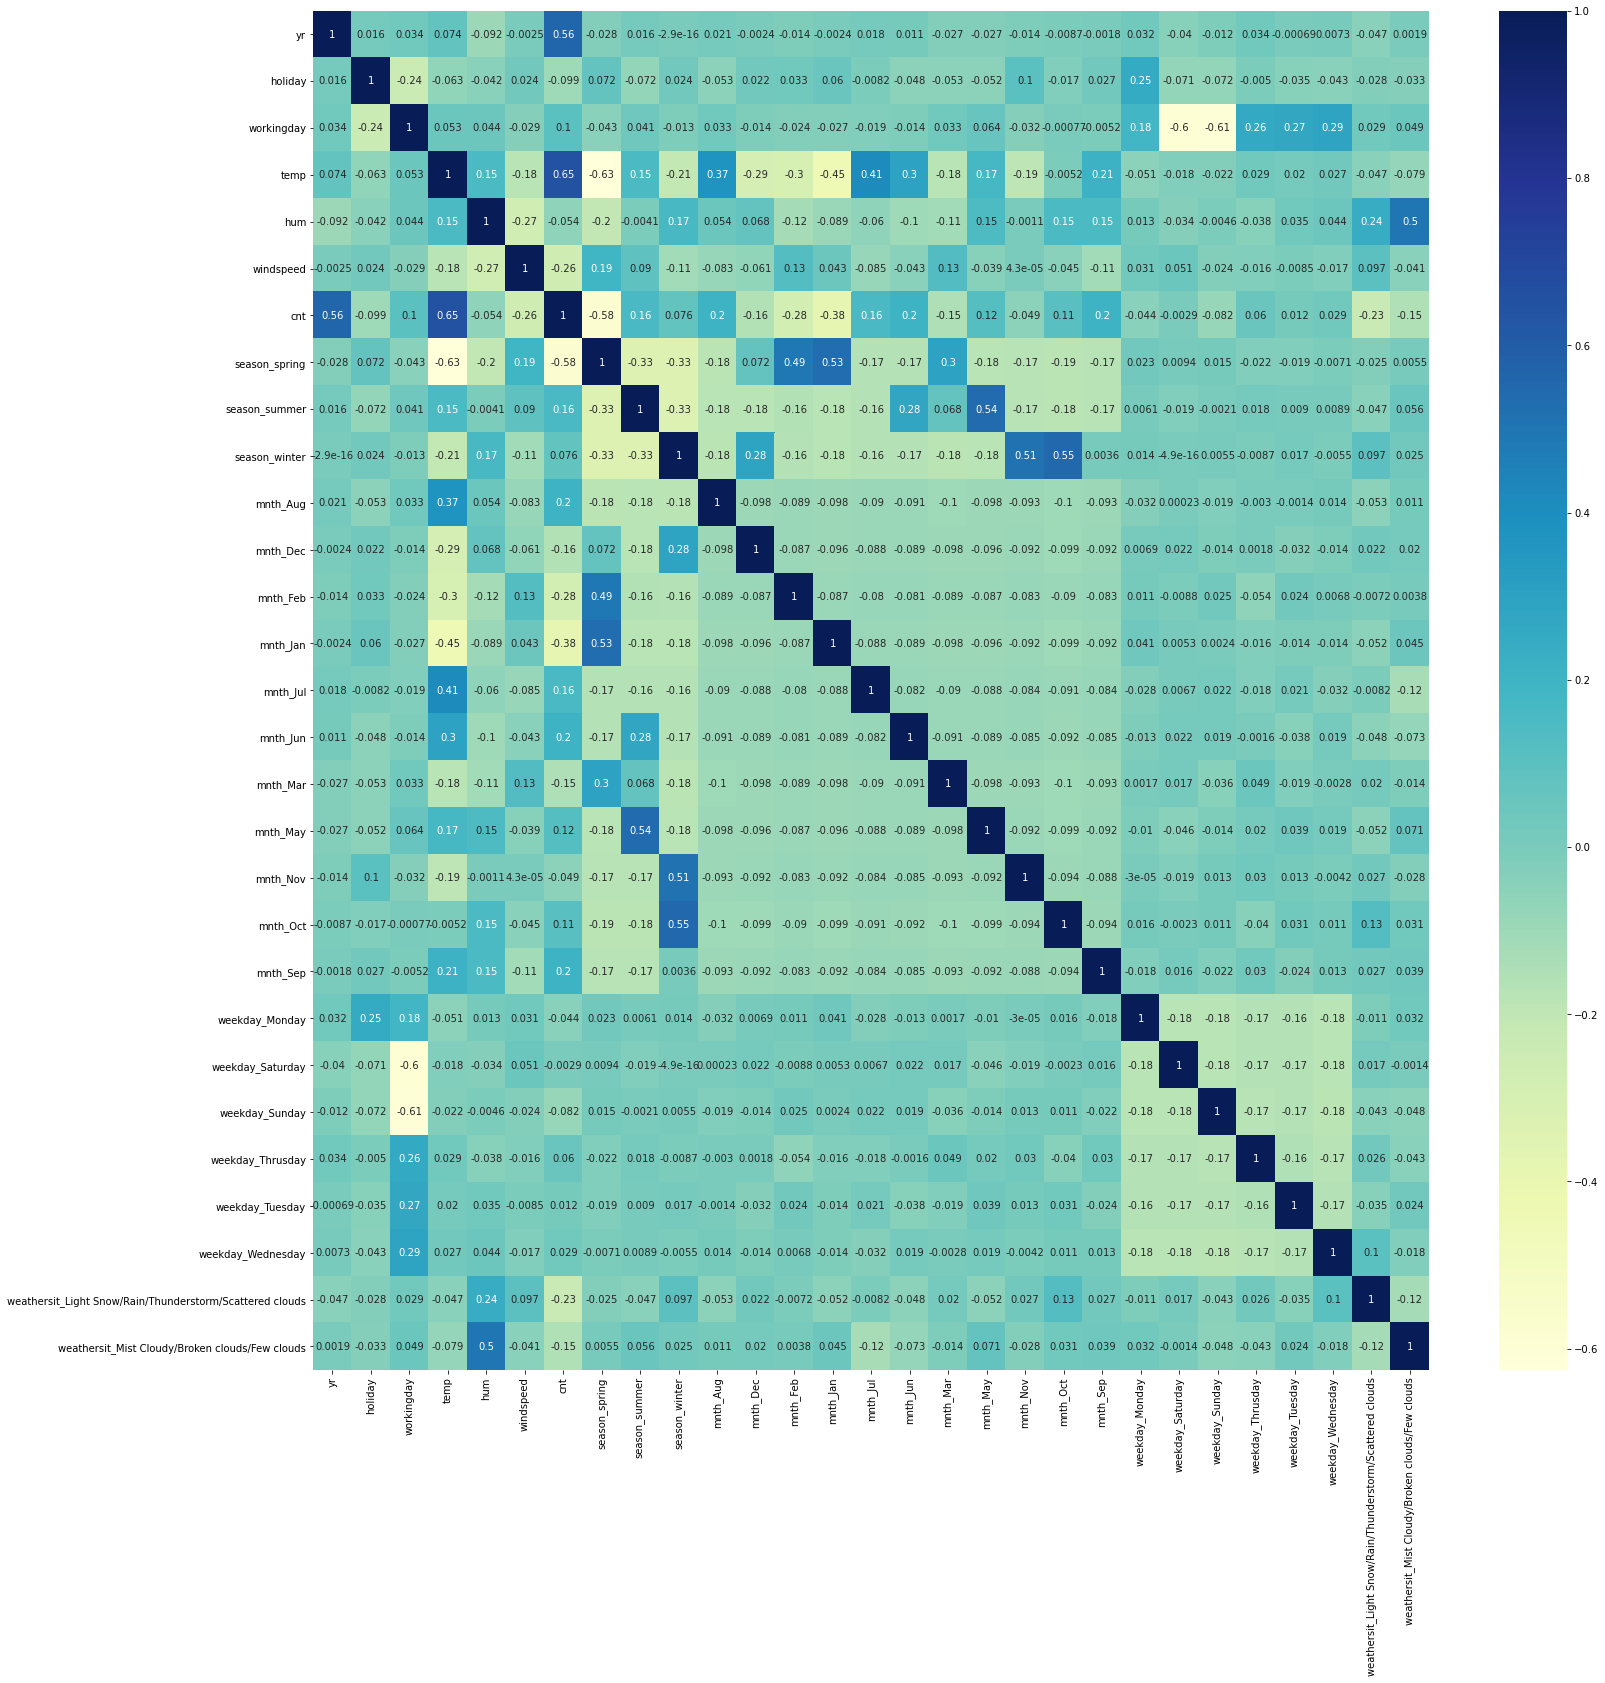

In [36]:
plt.figure(figsize = (25, 25))
sns.heatmap(bike_share_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Inferences:**

1. Months October and November are highly correlated with winter and May is highly correlated with summer season.

2. Humidity is correlated with broken/few clouds weather.

3. July and August months are correlated with temperature.

4. Saturday and Sunday are negatively correlated with workingdays.

As no 2 varibles are highly correlated(>0.8) with each other, will proceed with these columns, and in the later stages of model creation let's check the Multicollinearity.

### 4.5 Divide data into dependent & independent variables

In [37]:
# Contains data of dependent variable
y_train = bike_share_train.pop('cnt')
# Contains data of independent variables
X_train = bike_share_train

In [38]:
# Inspecting the train data independent variables
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow/Rain/Thunderstorm/Scattered clouds,weathersit_Mist Cloudy/Broken clouds/Few clouds
367,1,0,1,0.113228,0.454701,0.695175,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
648,1,0,1,0.468352,0.477458,0.299450,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
44,0,0,1,0.443431,0.387290,0.807474,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
705,1,0,1,0.326094,0.787463,0.189819,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
379,1,0,0,0.133996,0.431945,0.449210,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
X_train.shape

(584, 28)

## 5. Data Modelling & Evaluation

We have 28 variables to start with and it will be idle to use an automated approach to bring down the features of least significance. Then we can take a manual approach to finalize the significant variables by checking the VIF/p-values . 

### 5.1 RFE (Recursive Feature Elimination)

**We will use Recursive Feature Elimiation(RFE) approach to elimiate the features.**

**Lets bring down the number of features to 15 variables**

In [40]:
# Build a linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [41]:
# Use RFE approach to bring down the features to 15
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', False, 2),
 ('weekday_Monday', False, 6),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 5),
 ('weekday_Thrusday', False, 12),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow/Rain/Thunderstorm/Scattered clouds', True, 1),
 ('weathersit_Mist Cloudy/Broken clouds/Few clouds', True, 1)]

In [43]:
# Significant features
print(X_train.columns[rfe.support_])
# Insignificant features
print(X_train.columns[~rfe.support_])

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'weekday_Saturday',
       'weathersit_Light Snow/Rain/Thunderstorm/Scattered clouds',
       'weathersit_Mist Cloudy/Broken clouds/Few clouds'],
      dtype='object')
Index(['season_summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')


### 5.2 Building model using statsmodel

In [44]:
# Function to create the model for a given train dataframe
def build_model(X_train_RFE):
    X_train_SM = sm.add_constant(X_train_RFE)

    lr_sm = sm.OLS(y_train, X_train_SM)

    lr_sm_model = lr_sm.fit()
    print(lr_sm_model.summary())
    return lr_sm_model

In [45]:
# Function to check the Variance Inflation Factor(VIF) score for the model features
def calculate_vif(X_train_RFE):
    vif = pd.DataFrame()
    vif['Features'] = X_train_RFE.columns
    vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

#### Building the model using the features from the earlier generated RFE method

In [46]:
columns = X_train.columns[rfe.support_]
X_train_RFE = X_train[columns]

lr_sm_model = build_model(X_train_RFE)


calculate_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.02e-223
Time:                        13:22:58   Log-Likelihood:                 598.33
No. Observations:                 584   AIC:                            -1165.
Df Residuals:                     568   BIC:                            -1095.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

**Observations:**

The p-values for 'holiday' is quite high(0.07), making this feature insignificant.

The VIF value for the feature ''hum' is very high. Hence let's drop this column.

**Dropping column 'hum'**

In [47]:
columns = columns.drop(['hum'])
X_train_RFE = X_train[columns]

lr_sm_model = build_model(X_train_RFE)

calculate_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     226.1
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.00e-221
Time:                        13:22:58   Log-Likelihood:                 591.49
No. Observations:                 584   AIC:                            -1153.
Df Residuals:                     569   BIC:                            -1087.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

**Observations:**

1. The VIF scores of the features has come down substantially.

2. However, the p-value for holiday has increased even further(0.087), making this feature insignificant. Hence we will drop this column.

**Dropping column 'holiday'**

In [48]:
columns = columns.drop(['holiday'])
X_train_RFE = X_train[columns]
lr_sm_model = build_model(X_train_RFE)
calculate_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     242.4
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.72e-222
Time:                        13:22:58   Log-Likelihood:                 589.98
No. Observations:                 584   AIC:                            -1152.
Df Residuals:                     570   BIC:                            -1091.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

**Observations:**

1. The p-values of the features are close to zero, which concludes that all the variables are significant.

2. However, VIF scores few features are still high. 'temp' has the highest VIF score among all the variables. But 'temp' has a very high coefficient value(0.415). Also, during the EDA stage we found that 'temp' is highly correlated with 'cnt'. 
Dropping this feature is not recommended as this variable is on the key significant features of the model. Dropping this can also bring down the R-sq value. Hence let's go with dropping the second highest feature, which is 'workingday'. Also, as we can see coefficient for 'workingday' is really low(0.0589) and this feature will have very little impact on the predicted value as a whole.

**Dropping column 'workingday'**

In [49]:
columns = columns.drop(['workingday'])
X_train_RFE = X_train[columns]
lr_sm_model = build_model(X_train_RFE)
calculate_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     244.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          5.57e-216
Time:                        13:22:58   Log-Likelihood:                 572.19
No. Observations:                 584   AIC:                            -1118.
Df Residuals:                     571   BIC:                            -1062.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

**Observations:**

1. The p-value value for 'weekday_Saturday' is quite high, making it insignificant. Hence let's drop this column.

**Dropping column 'weekday_Saturday'**

In [50]:
columns = columns.drop(['weekday_Saturday'])
X_train_RFE = X_train[columns]
lr_sm_model = build_model(X_train_RFE)
calculate_vif(X_train_RFE)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     264.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          4.16e-216
Time:                        13:22:58   Log-Likelihood:                 569.60
No. Observations:                 584   AIC:                            -1115.
Df Residuals:                     572   BIC:                            -1063.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

**Observations:**

1. The p-values of all the coefficients are close to zero, making each of them significant.

2. VIF scores of the features looks to be satisfactory (less than 5)

In [51]:
print(lr_sm_model.params)
print(lr_sm_model.summary())

const                                                       0.288727
yr                                                          0.232241
temp                                                        0.419286
windspeed                                                  -0.156988
season_spring                                              -0.116115
season_winter                                               0.074952
mnth_Dec                                                   -0.066253
mnth_Jan                                                   -0.055208
mnth_Jul                                                   -0.073954
mnth_Nov                                                   -0.077074
weathersit_Light Snow/Rain/Thunderstorm/Scattered clouds   -0.291622
weathersit_Mist Cloudy/Broken clouds/Few clouds            -0.077537
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836

**Statistics from the generated model:**

1. R-squared:                       0.836  --> High R-squared value confirms that the model explains the data really well.

2. Adj. R-squared:                  0.833  --> High Adj. R-squared confirms that the number of features are not very high and the model is not overfitted.

3. Prob (F-statistic):          4.16e-216  --> Low prob(f-statistic) indicates that the overall model fits in well.

4. AIC:                            -1115.  --> Low AIC value confirms that the model is decently accurate.


### 5.3 Assumptions of Residual Analysis

In [52]:
X_train_SM = sm.add_constant(X_train_RFE)

In [53]:
y_train_pred = lr_sm_model.predict(X_train_SM)
residual_error = y_train - y_train_pred

#### 5.3.1 Error Terms are Normally Distributed 

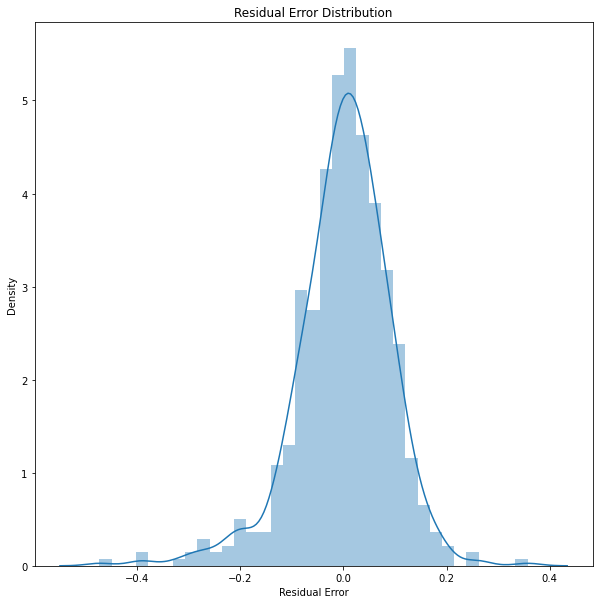

In [54]:
plt.figure(figsize=(10,10))
sns.distplot(residual_error)
plt.xlabel('Residual Error')
plt.title('Residual Error Distribution')
plt.show()

**We can clearly see that the error terms(residuals) are normally distributed and they are centered at a mean of '0'.**

#### 5.3.2 Multicollinearity (low association between predictor variables)

In [55]:
calculate_vif(X_train_RFE)

                                             Features   VIF
1                                                temp  4.35
2                                           windspeed  4.10
4                                       season_winter  2.35
3                                       season_spring  2.34
0                                                  yr  2.07
8                                            mnth_Nov  1.65
6                                            mnth_Jan  1.61
10    weathersit_Mist Cloudy/Broken clouds/Few clouds  1.52
5                                            mnth_Dec  1.41
7                                            mnth_Jul  1.32
9   weathersit_Light Snow/Rain/Thunderstorm/Scatte...  1.07


**Clearly the VIF scores for the features are less than 5, which explains that the features are not closely associated.**

#### 5.3.3 Homoscedasticity - Probability distribution of errors has constant variance

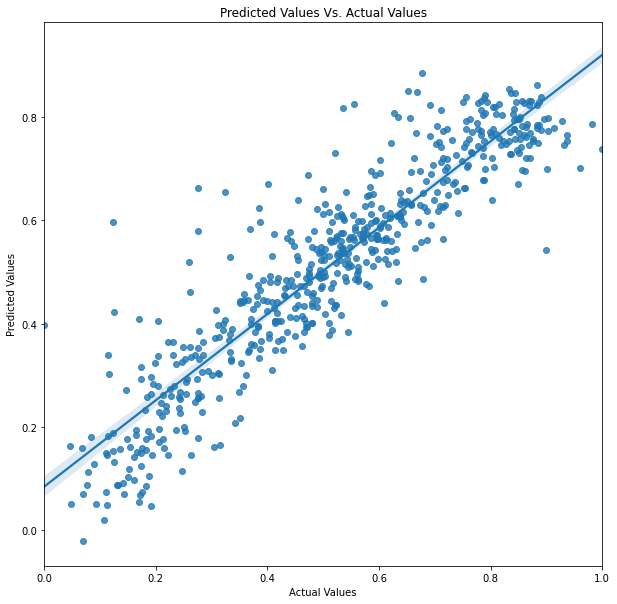

In [56]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_train, y=y_train_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values Vs. Actual Values')
plt.show()

**We can see that residuals are equally distributed across predicted value - which confirms Homoscedasticity
This means we see equal variance of the error terms across the dataset and it is not concentrated in only few places.**

#### 5.3.4 Error Terms are Independent

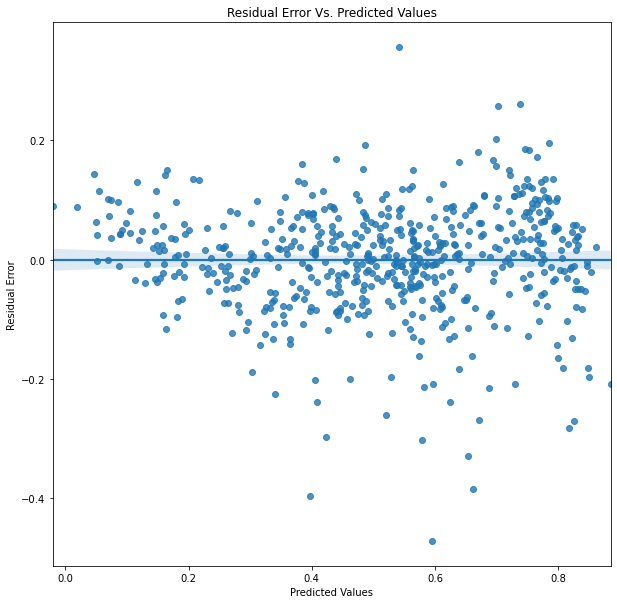

In [57]:
plt.figure(figsize=(10,10))
sns.regplot(y=residual_error, x=y_train_pred)
plt.xlabel('Predicted Values')
plt.ylabel('Residual Error')
plt.title('Residual Error Vs. Predicted Values')
plt.show()

**Clearly, all the residuals are scattered across the plot and don't follow any pattern. This confirms that the error terms are independent.**

### 5.4 Evaluating the model on Test data

#### 5.4.1 Rescaling the test data

In [58]:
bike_share_test[transform_columns] = scaler.transform(bike_share_test[transform_columns])

#### 5.4.2 Dividing test data into dependent & independent variables

In [59]:
y_test = bike_share_test.pop('cnt')
X_test = bike_share_test

In [60]:
# Consider only the columns which are chosen in building the model
X_test_features = X_test[columns]
# Adding the constant feature to the test dataset
X_test_features = sm.add_constant(X_test_features)

In [61]:
X_test_features.shape

(146, 12)

In [62]:
X_test_features.describe()

,const,yr,temp,windspeed,season_spring,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,weathersit_Light Snow/Rain/Thunderstorm/Scattered clouds,weathersit_Mist Cloudy/Broken clouds/Few clouds
count,146.0,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,1.0,0.445205,0.569603,0.315127,0.226027,0.219178,0.075342,0.075342,0.123288,0.089041,0.034247,0.315068
std,0.0,0.498699,0.238088,0.161524,0.419697,0.415114,0.264852,0.264852,0.329899,0.285783,0.182488,0.466142
min,1.0,0.000000,0.046591,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.359075,0.196160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.560248,0.306383,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,0.801929,0.411976,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.0,1.000000,0.984424,0.800793,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 5.4.3 Predicting the values from the test data using the model generated

In [63]:
y_pred = lr_sm_model.predict(X_test_features)

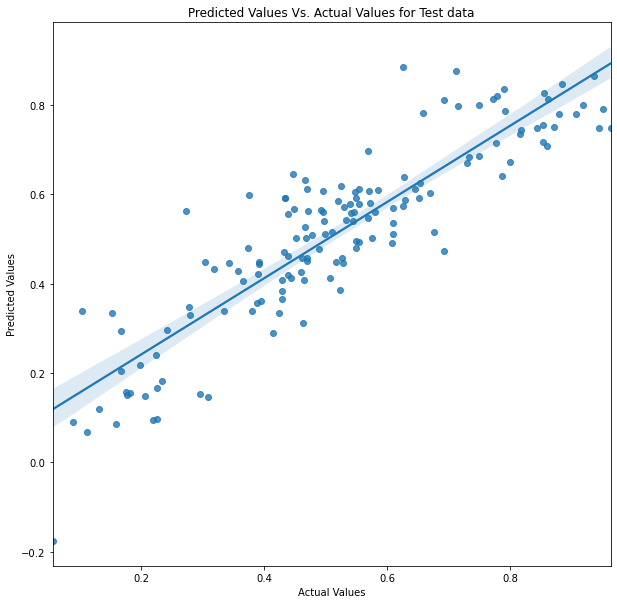

In [64]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values Vs. Actual Values for Test data')
plt.show()

**R-squared value for test data**

In [65]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7861499129892774


**Adjusted R-squared for test data**

In [66]:
n = X_test_features.shape[0]
p = X_test_features.shape[1]

In [67]:
adj_r2 = 1 - (1 - r2)*(n-1)/(n-p-1)
print(adj_r2)

0.7668551682965806


In [68]:
# MSE(Mean Squared Error) for test data
print(mean_squared_error(y_test, y_pred))

0.009613732396868649


**R-squared and Adj.R-squared for training and test data**

**Train data:**

R-squared:                       0.836

Adj. R-squared:                  0.833


**Test Data:**

R-squared:                       0.786

Adj. R-squared:                  0.766

**We have achieved satisfactory results for R-squared & Adj. R-squared.**

**Adj. R-squared is not widely deviated from R-squared value, indicating that we chose reasonable number of features for our model and its not overfitted.**

### 5.5 Final Model

**5.5.1 Model Summary**

In [69]:
print(lr_sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     264.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          4.16e-216
Time:                        13:23:00   Log-Likelihood:                 569.60
No. Observations:                 584   AIC:                            -1115.
Df Residuals:                     572   BIC:                            -1063.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

**5.5.2 Model Features**

In [70]:
print(lr_sm_model.params)

const                                                       0.288727
yr                                                          0.232241
temp                                                        0.419286
windspeed                                                  -0.156988
season_spring                                              -0.116115
season_winter                                               0.074952
mnth_Dec                                                   -0.066253
mnth_Jan                                                   -0.055208
mnth_Jul                                                   -0.073954
mnth_Nov                                                   -0.077074
weathersit_Light Snow/Rain/Thunderstorm/Scattered clouds   -0.291622
weathersit_Mist Cloudy/Broken clouds/Few clouds            -0.077537
dtype: float64


**5.5.3 Linear Equation representing the model (Equation for the best fitted line)**

**cnt = 0.288 + 0.232 * yr + 0.419 * temp + 0.074 * season_winter - 0.156 * windspeed - 0.116 * season_spring - 0.066 * mnth_Dec - 0.55 * mnth_Jan - 0.07 * mnth_Jul - 0.291 * weathersit_Light Snow/Rain/Thunderstorm/Scattered clouds - 0.077 * weathersit_Mist Cloudy/Broken clouds/Few clouds**

**Inferences:**

1. Year, Temperature, Winter Season have positive coefficients indicating that the ride counts increases with the increase of these features.

2. Spring season, December/January/July months, cloudy and rainy weathers have negative coefficients which indicates that the ride counts decreases with these features.

3. Temperature has the highest positive coefficient, which indicates that the higher temperatures is what riders prefer the most.

4. Year on year, number of riders who are taking the rides are increasing.

5. Riders doesn't prefer to ride during rains and thunderstorms.